In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
csv_file = r"C:\Users\Asus\Desktop\refined_dataset\damaged cells\C08_discharge_soh.csv"  # Modify the file path as needed

In [44]:
# Load the CSV file
df = pd.read_csv(csv_file)

In [45]:
# Extract cycle data (X) and SOH data (y)
X = df['cycle'].values
y = df['SOH'].values

In [46]:
# Define the ANN model
model = Sequential()
model.add(Dense(16, input_shape=(1,), activation='relu'))  # First hidden layer with 16 neurons
model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 neurons
model.add(Dense(1))  # Output layer with 1 neuron

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
# Train the model
model.fit(X.reshape(-1, 1), y, epochs=50)

Epoch 1/50
734/734 [==============================] - 4s 4ms/step - loss: 0.1033
Epoch 2/50
734/734 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 3/50
734/734 [==============================] - 2s 3ms/step - loss: 8.8304e-04
Epoch 4/50
734/734 [==============================] - 2s 2ms/step - loss: 7.4040e-04
Epoch 5/50
734/734 [==============================] - 2s 3ms/step - loss: 7.4237e-04
Epoch 6/50
734/734 [==============================] - 2s 2ms/step - loss: 7.7495e-04
Epoch 7/50
734/734 [==============================] - 2s 2ms/step - loss: 8.2884e-04
Epoch 8/50
734/734 [==============================] - 2s 3ms/step - loss: 0.0011
Epoch 9/50
734/734 [==============================] - 2s 3ms/step - loss: 8.5781e-04
Epoch 10/50
734/734 [==============================] - 3s 4ms/step - loss: 0.0010
Epoch 11/50
734/734 [==============================] - 2s 3ms/step - loss: 8.4471e-04
Epoch 12/50
734/734 [==============================] - 2s 3ms/step - loss: 9.76

In [49]:
# Predict using the trained model
y_pred = model.predict(X.reshape(-1, 1)).flatten()

734/734 [==============================] - 2s 3ms/step


In [50]:
# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

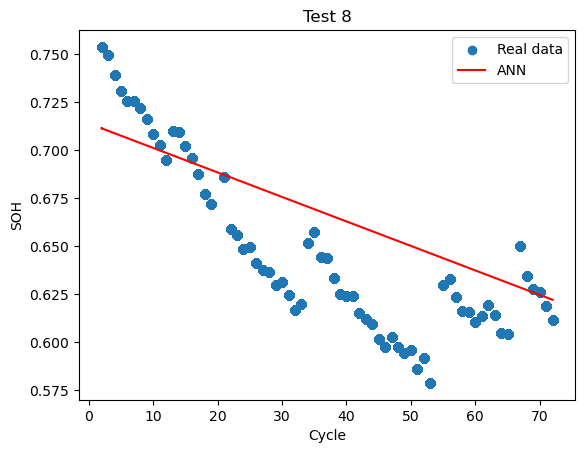

In [51]:
# Plot the data and linear regression line
plt.scatter(X, y, label='Real data')
plt.plot(X, y_pred, color='red', label='ANN')
plt.xlabel('Cycle')
plt.ylabel('SOH')
plt.title('Test 8')
plt.legend()
plt.savefig(r'C:\Users\Asus\Desktop\ann8.png', dpi=600)
plt.show()

In [52]:
# Print metrics
print("Mean Squared Error (MSE):", mse*1000)
print("Mean Absolute Error (MAE):", mae*10)
print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse*10)

Mean Squared Error (MSE): 1.0944818201293145
Mean Absolute Error (MAE): 0.2793341171096966
R2 Score: 0.48745434913398755
Root Mean Squared Error (RMSE): 0.3308295361858301
